In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [26]:
df = pd.read_csv("hearing_test.csv")

In [27]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [28]:
df.sample(5)

,age,physical_score,test_result
1773,39.000,37.700,1
3718,35.000,40.800,1
3091,49.000,36.200,1
2330,39.000,40.900,1
1912,38.000,44.400,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [31]:
df["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

In [32]:
df["test_result"]

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

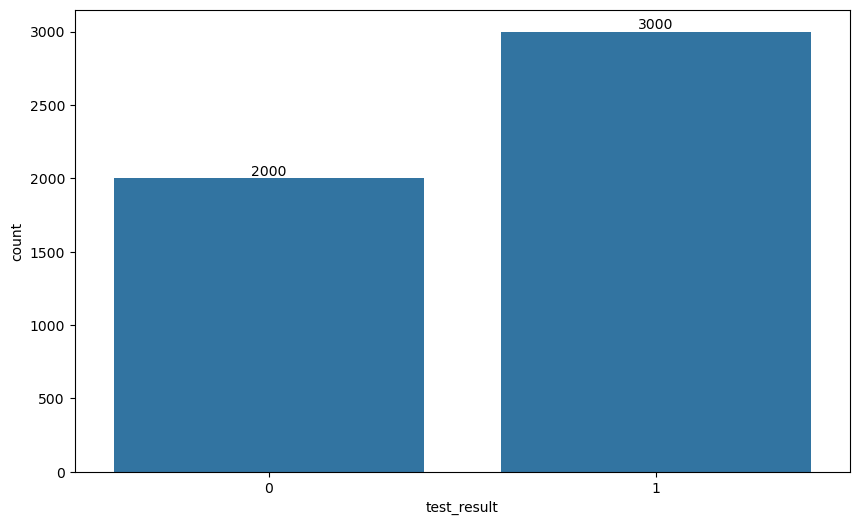

In [33]:
ax = sns.countplot(x='test_result', data=df)
ax.bar_label(ax.containers[0])
plt.show()

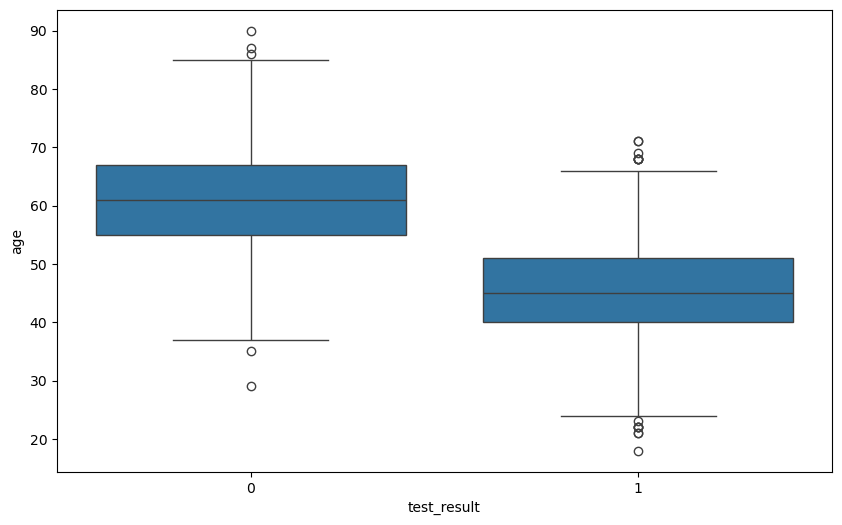

In [34]:
sns.boxplot(x="test_result", y="age",data=df)
plt.show()

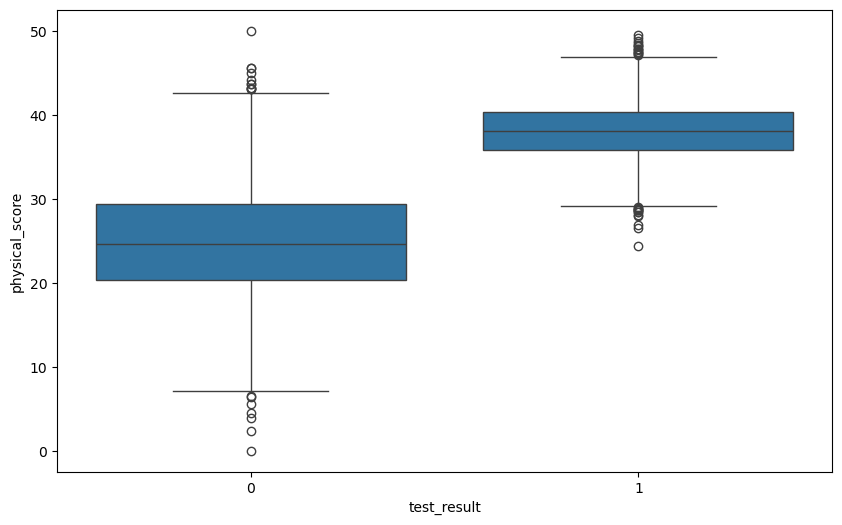

In [35]:
sns.boxplot(x="test_result", y="physical_score", data=df)
plt.show()

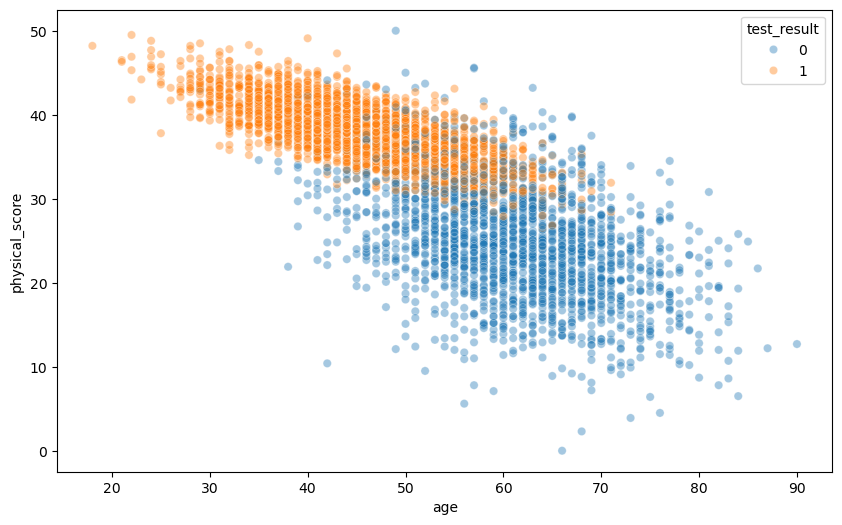

In [36]:
sns.scatterplot(x="age",y="physical_score",data=df,hue="test_result",alpha=0.4)
plt.show()

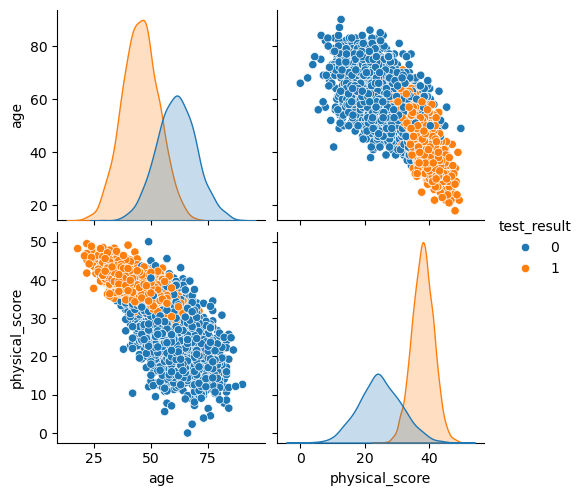

In [37]:
sns.pairplot(df, hue="test_result")
plt.show()

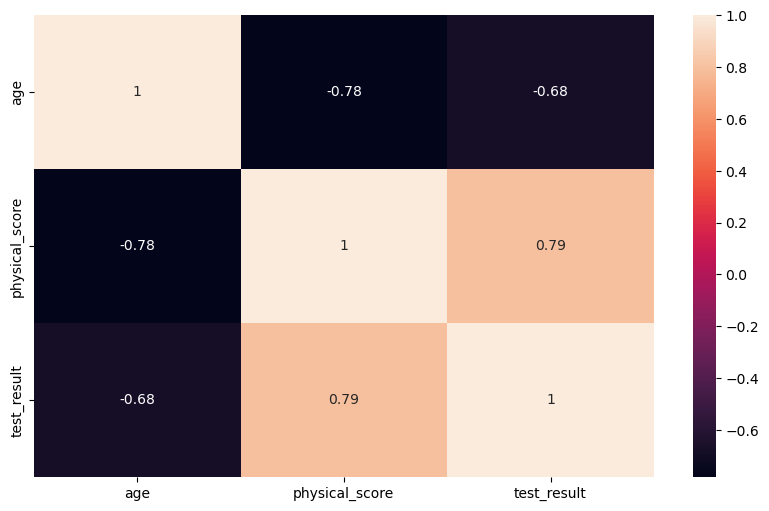

In [38]:
sns.heatmap(df.corr(),annot=True)
plt.show()

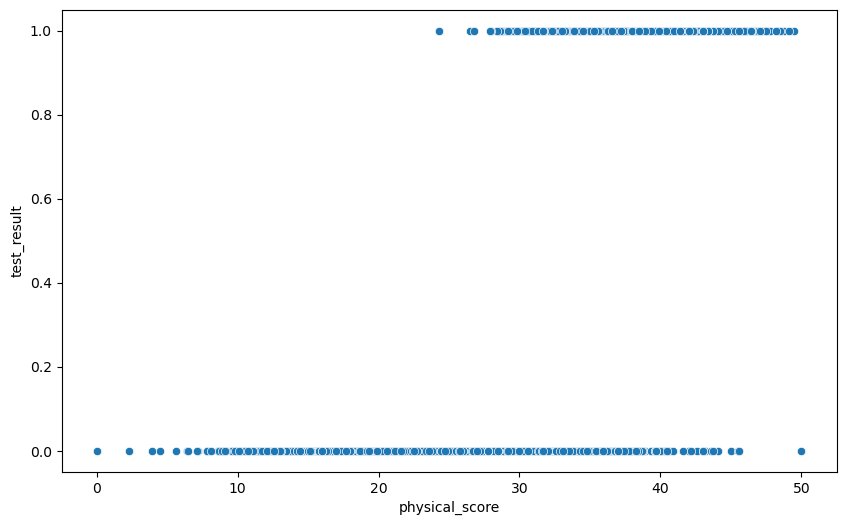

In [23]:
sns.scatterplot(x='physical_score', y='test_result', data=df)
plt.show()

In [39]:
X = df.drop("test_result",axis=1)
y = df["test_result"]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_model = LogisticRegression


In [44]:
log_model.fit(X_train,y_train)

AttributeError: 'DataFrame' object has no attribute '_validate_params'